In [24]:
import tensorflow as tf
from tensorflow.keras import layers, models 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
#import pandas as pd 
import matplotlib.pyplot as plt
from PIL import Image

In [25]:
# Paso 2: Cargar el conjunto de datos MNIST (tiene 60 mil imágenes)
#Xtesr y y Test tuenen 10 mil imagenes de prueba.
(x_train, y_train), (x_test, y_test) = mnist.load_data()

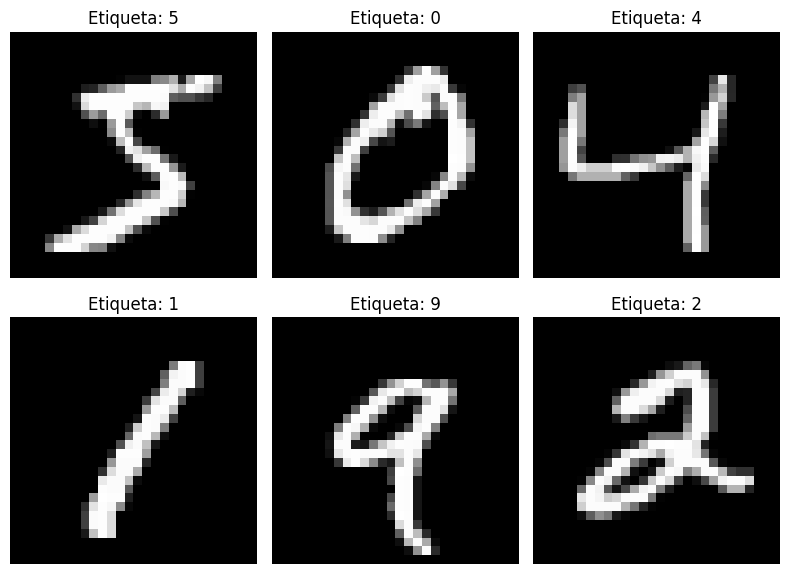

In [26]:
filas = 2
columnas = 3

# Crea una figura y ajusta el tamaño
plt.figure(figsize=(8, 6))

# Recorre y muestra las imágenes en la cuadrícula
for i in range(filas * columnas):
    plt.subplot(filas, columnas, i + 1)  # Crea un subplot en la posición correspondiente
    plt.imshow(x_train[i], cmap='gray')  # Muestra la imagen en escala de grises
    plt.title(f"Etiqueta: {y_train[i]}")  # Agrega el título con la etiqueta de la imagen
    plt.axis('off')  # Oculta los ejes

# Muestra la cuadrícula completa
plt.tight_layout()
plt.show()


In [27]:
# Paso 3: Preprocesar los datos

# Reescalar y redimensionar las imágenes de entrenamiento y prueba en una sola línea
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Generador para el conjunto de entrenamiento con transformaciones adecuadas para MNIST
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,        #Escala los pixeles de 0-1
    zoom_range=0.2,             # Pequeño zoom permite reconocer el mismo digito cuando varia de tamaño
    rotation_range=10,          # Rotación ligera, ayuda a generalizar donde los digitos estan ligeramente rotados
    validation_split=0.2        # Usar 20% para validación 80% para entrenamiento
)
# Generador para el conjunto de validación sin aumentación de datos
valid_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    validation_split=0.2
)

# Generador para el conjunto de prueba, solo reescalado
test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Aplicar generadores a los conjuntos de datos con la división para entrenamiento y validación
train_dataset = train_datagen.flow(x_train, y_train, batch_size=64, subset='training')
validation_dataset = valid_datagen.flow(x_train, y_train, batch_size=64, subset='validation')
test_dataset = test_datagen.flow(x_test, y_test, batch_size=64)



In [ ]:
model = tf.keras.models.Sequential([
    # Primera capa convolucional con 32 filtros, tamaño de kernel 3x3
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1), padding='same'), #Detecta caracteristicas simples, bordes texturas
    tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'), #Combina las caracteristicas anteriores para detectar patrones
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)), #Capa de agrupamiento, manteniendo las caracteristicas mas importantes
    
    # Segunda capa convolucional con 64 filtros
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    # Tercera capa convolucional con 128 filtros
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPool2D(pool_size=(2, 2)),
    
    # Aplanar las características para pasarlas a las capas densas
    tf.keras.layers.Flatten(),
    
    # Primera capa densa con 512 unidades
    tf.keras.layers.Dense(units=512, activation='relu'),
    tf.keras.layers.Dropout(0.1),  # Dropout para evitar sobreajuste
    
    # Segunda capa densa con 256 unidades
    tf.keras.layers.Dense(units=256, activation='relu'),
    
    # Capa de salida con 10 neuronas para las 10 clases y softmax para clasificación multiclase
    tf.keras.layers.Dense(units=10, activation='softmax'),
])

# Compila el modelo
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])



In [29]:
#Resumen del modelo:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 28, 28, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 7, 7, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 3, 3, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,666 (3.86 MB)

 Trainable params: 1,010,666 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [30]:
# Ajustar EarlyStopping para monitorear la precisión de validación
monitor = EarlyStopping(monitor='val_accuracy', patience=2, 
                        verbose=1, mode='max', restore_best_weights=True)

# Definir ModelCheckpoint para guardar el mejor modelo según la precisión de validación
filepath = './best_weights.keras'  # Cambiado a .keras
checkpoint = ModelCheckpoint(filepath, 
                             monitor='val_accuracy', 
                             mode='max', 
                             save_best_only=True, 
                             verbose=1)

# Lista de callbacks
callback_list = [monitor, checkpoint]

# Compilar el modelo
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [31]:
# Paso 6: Entrenar el modelo
history = model.fit(train_dataset,
                              validation_data=validation_dataset,
                              epochs=15,
                              verbose=1, callbacks=callback_list)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7935 - loss: 0.6174
Epoch 1: val_accuracy improved from -inf to 0.98317, saving model to ./best_weights.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 32s 41ms/step - accuracy: 0.7936 - loss: 0.6169 - val_accuracy: 0.9832 - val_loss: 0.0578
Epoch 2/15
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9788 - loss: 0.0675
Epoch 2: val_accuracy did not improve from 0.98317
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.9788 - loss: 0.0675 - val_accuracy: 0.9832 - val_loss: 0.0683
Epoch 3/15
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.9850 - loss: 0.0492
Epoch 3: val_accuracy improved from 0.98317 to 0.98575, saving model to ./best_weights.keras
750/750 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.9850 - loss: 0.0492 - val_accuracy: 0.9858 - val_loss: 0.0518
Epoch 4/15
749/750 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - accuracy: 0.9890 - loss: 0.0372
Epoch 4: val_accuracy improved from 0.98575 to 0.98917, savin

In [32]:
# Paso 7: Evaluar el modelo
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Precisión en el conjunto de prueba: {test_acc}')


313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9888 - loss: 6.4621
Precisión en el conjunto de prueba: 0.9902999997138977


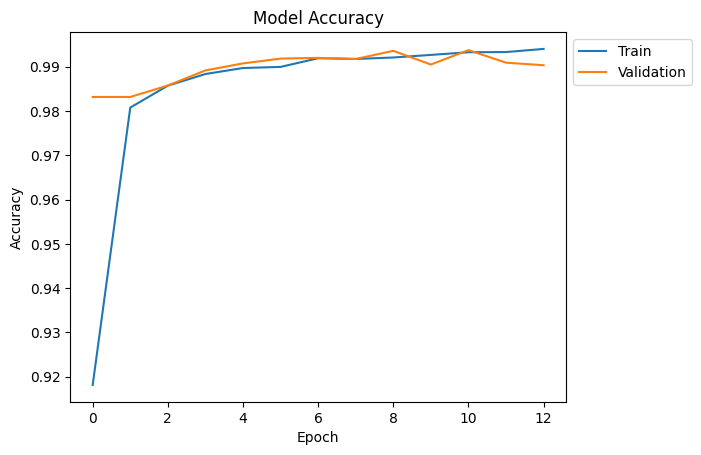

In [33]:
# Graficar la precisión de entrenamiento y validación
plt.plot(history.history['accuracy'])  # Precisión de entrenamiento
plt.plot(history.history['val_accuracy'])  # Precisión de validación
plt.title('Model Accuracy')  # Título de la gráfica
plt.ylabel('Accuracy')  # Etiqueta del eje Y
plt.xlabel('Epoch')  # Etiqueta del eje X
plt.legend(['Train', 'Validation'], loc='upper left', bbox_to_anchor=(1, 1))  # Leyenda
plt.show()  # Mostrar la gráfica

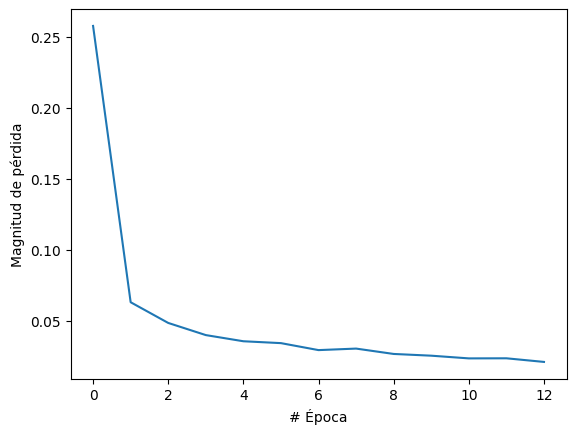

In [34]:
plt.xlabel("# Época")

plt.ylabel("Magnitud de pérdida")

plt.plot(history.history["loss"])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step


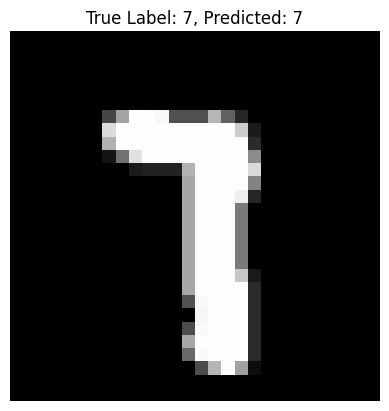

In [35]:
# Cargar el conjunto de datos MNIST
(_, _), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Seleccionar un índice aleatorio de las imágenes de prueba
index = np.random.randint(0, len(x_test))
test_image = x_test[index]  # Imagen de prueba
true_label = y_test[index]   # Etiqueta verdadera

# Preprocesar la imagen: agregar un eje para el batch y normalizar
test_image = test_image.reshape(-1, 28, 28, 1).astype("float32") / 255.0

# Realizar la predicción
predictions = model.predict(test_image)
predicted_class = np.argmax(predictions)  # Obtener la clase predicha

# Mostrar la imagen, la etiqueta verdadera y la predicción
plt.imshow(test_image[0].reshape(28, 28), cmap='gray')  # Mostrar la imagen en escala de grises
plt.title(f'True Label: {true_label}, Predicted: {predicted_class}')  # Mostrar la etiqueta y la predicción
plt.axis('off')  # Ocultar los ejes
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Predicción para la imagen personalizada: 1


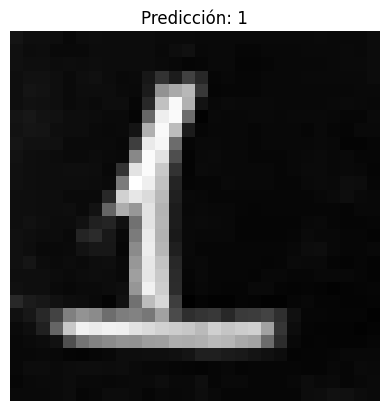

In [ ]:

# ruta de las imagenes
ruta_imagen = "C:/SEBASTIAN/BOOTCAMP IA/test2/1.png"

def predecir_imagen_personalizada(ruta_imagen):
    # Cargar y preprocesar la imagen
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(28, 28, 1).astype('float32') / 255.0  # Normalizar y agregar un eje para el canal

    # Agregar un eje adicional para el batch
    img_array = np.expand_dims(img_array, axis=0)  # Cambia la forma a (1, 28, 28, 1)

    # Hacer la predicción
    prediccion = model.predict(img_array)  
    digit_predicho = np.argmax(prediccion)  # Obtener el dígito predicho

    # Mostrar resultados
    print(f'Predicción para la imagen personalizada: {digit_predicho}')
    plt.imshow(img, cmap='gray')  # Mostrar la imagen original
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()

# Llamar a la función con la ruta de la imagen
predecir_imagen_personalizada(ruta_imagen)


In [37]:
model.save("model_manusc_mejorado.h5") #Guardar Modelo como archivo HDF5
print("Modelo Guardado")

Modelo Guardado


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicción para la imagen 1.png: 1


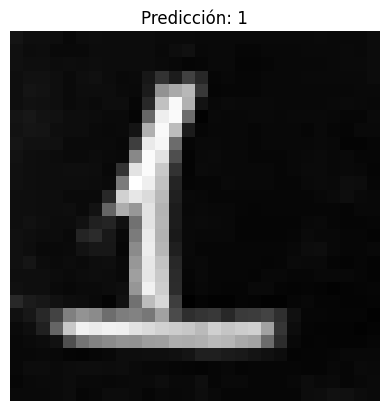

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Predicción para la imagen 2.png: 2


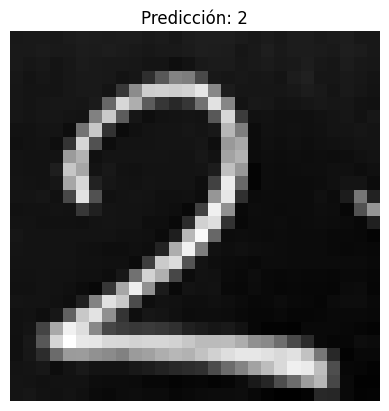

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicción para la imagen 3.png: 3


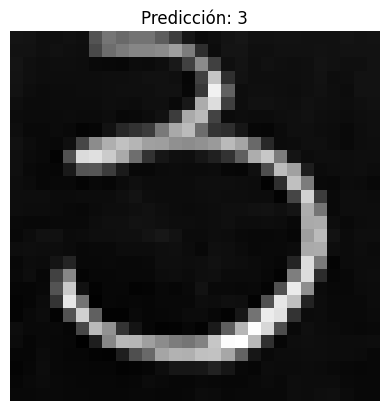

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
Predicción para la imagen 4.png: 4


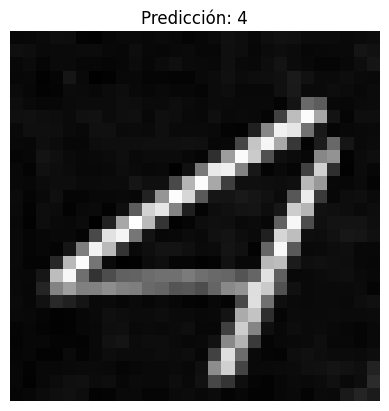

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Predicción para la imagen 5.png: 5


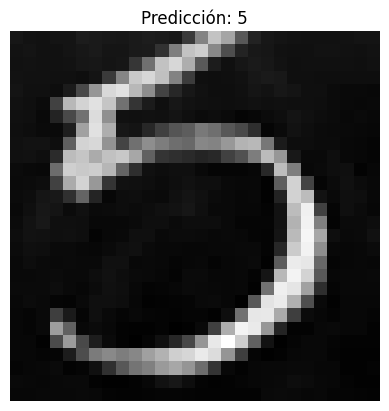

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicción para la imagen 6.png: 6


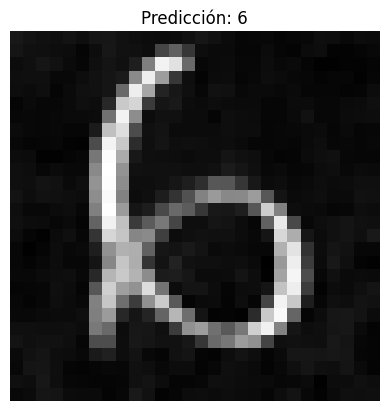

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción para la imagen 7.png: 7


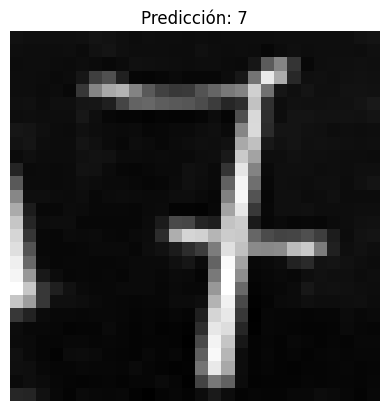

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción para la imagen 8.png: 8


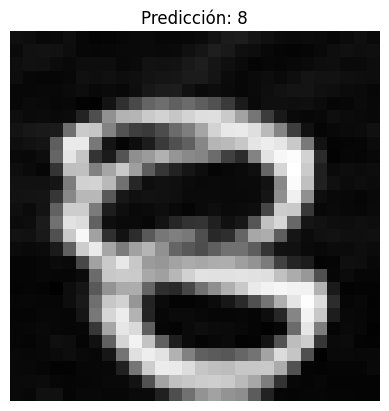

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicción para la imagen 9.png: 9


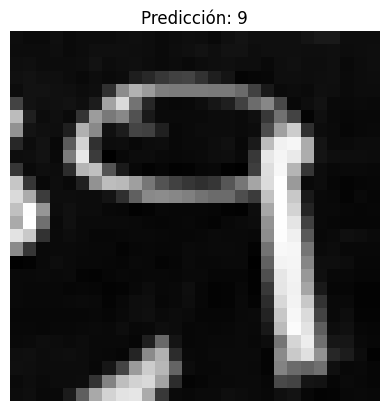

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicción para la imagen cicno.png: 1


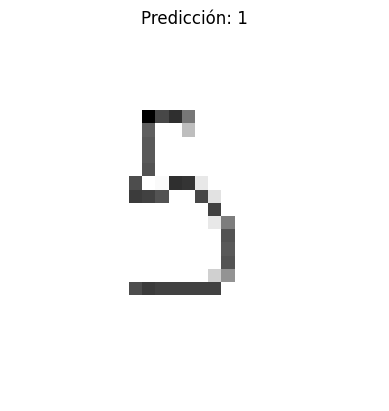

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicción para la imagen dos.png: 1


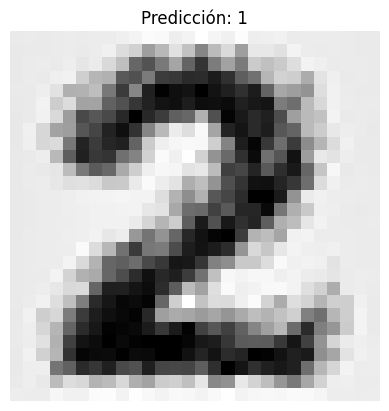

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
Predicción para la imagen imagen prueba.jpg: 9


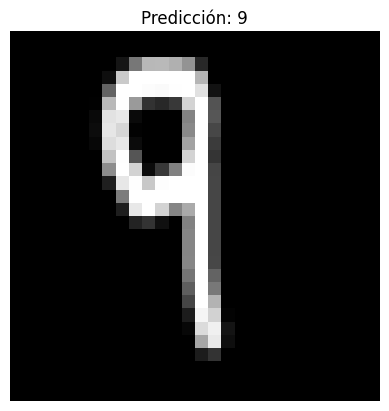

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicción para la imagen imagen prueba2.jpg: 2


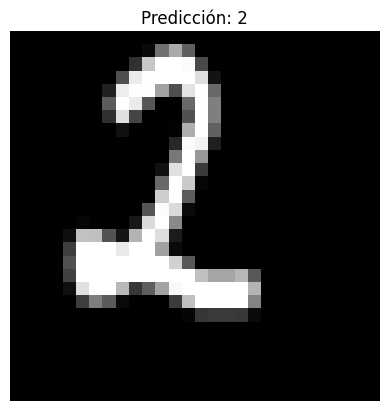

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicción para la imagen imagen prueba3.jpg: 9


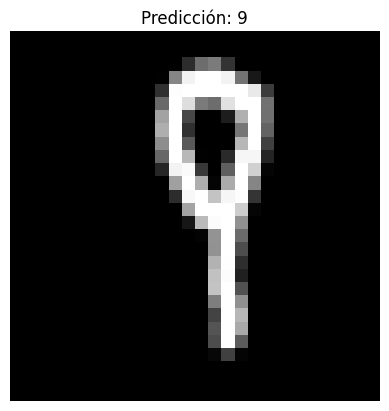

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Predicción para la imagen imagen prueba4.png: 9


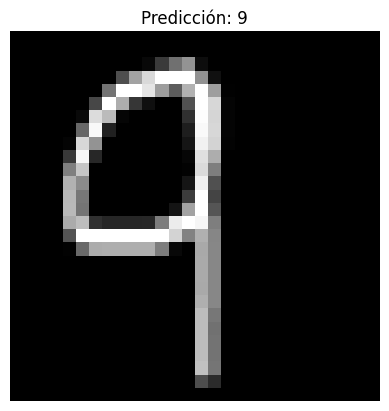

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
Predicción para la imagen imagencero.png: 0


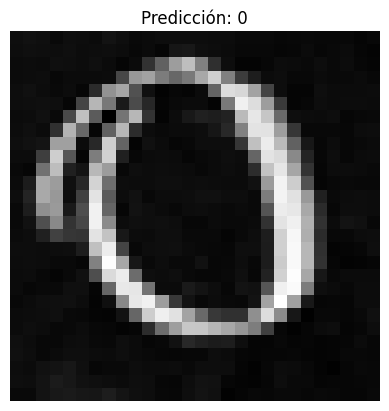

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Predicción para la imagen ocho.png: 8


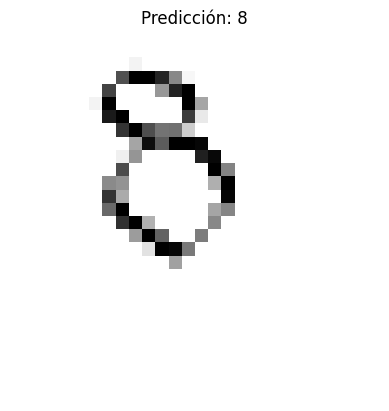

In [43]:
import os

# Define la ruta de la carpeta que contiene las imágenes
ruta_carpeta = "C:/SEBASTIAN/BOOTCAMP IA/test2"

def predecir_imagen_personalizada(ruta_imagen):
    # Cargar y preprocesar la imagen
    img = Image.open(ruta_imagen).convert('L')  # Convertir a escala de grises
    img = img.resize((28, 28))  # Redimensionar a 28x28 píxeles
    img_array = np.array(img).reshape(28, 28, 1).astype('float32') / 255.0  # Normalizar y agregar un eje para el canal

    # Agregar un eje adicional para el batch
    img_array = np.expand_dims(img_array, axis=0)  # Cambia la forma a (1, 28, 28, 1)

    # Hacer la predicción
    prediccion = model.predict(img_array)  
    digit_predicho = np.argmax(prediccion)  # Obtener el dígito predicho

    # Mostrar resultados
    print(f'Predicción para la imagen {os.path.basename(ruta_imagen)}: {digit_predicho}')  # Muestra el nombre de la imagen
    plt.imshow(img, cmap='gray')  # Mostrar la imagen original
    plt.title(f'Predicción: {digit_predicho}')
    plt.axis('off')  # Ocultar los ejes
    plt.show()

# Iterar sobre todas las imágenes en la carpeta
for nombre_archivo in os.listdir(ruta_carpeta):
    # Crear la ruta completa del archivo
    ruta_imagen = os.path.join(ruta_carpeta, nombre_archivo)

    # Comprobar si el archivo es una imagen (puedes ajustar las extensiones según sea necesario)
    if nombre_archivo.lower().endswith(('.png', '.jpg', '.jpeg')):
        predecir_imagen_personalizada(ruta_imagen)
